In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_newswire = ''.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

557056/550378 [==============================] - 1s 2us/step


In [6]:
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, word_num in enumerate(sequences):
        results[i, word_num] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Built in function:
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

# Integer tensor — instead of one-hot encoding
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# Use sparse_categorical_crossentropy

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 406us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

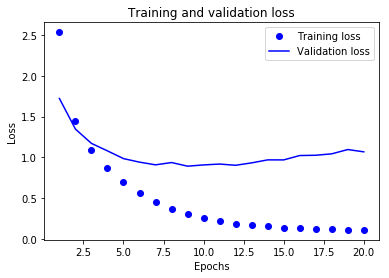

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

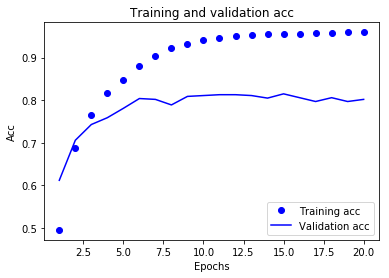

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 128us/step - loss: 2.8815 - acc: 0.5006 - val_loss: 1.9285 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 68us/step - loss: 1.5125 - acc: 0.7100 - val_loss: 1.3268 - val_acc: 0.7160
Epoch 3/9
7982/7982 [==============================] - 1s 68us/step - loss: 1.0559 - acc: 0.7785 - val_loss: 1.1148 - val_acc: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.8140 - acc: 0.8267 - val_loss: 1.0092 - val_acc: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 69us/step - loss: 0.6464 - acc: 0.8654 - val_loss: 0.9437 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.5173 - acc: 0.8916 - val_loss: 0.9276 - val_acc: 0.8010
Epoch 7/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.4205 - acc: 0.9156 - val_loss: 0.8805 - val_acc: 0.8200
Epoch 8/9
798

[0.9583338852557134, 0.7920747996968874]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19857524487978628

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.9999998

In [27]:
np.argmax(predictions[0])

3